In [133]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib  import cm

#from matplotlib.colors import TwoSlopeNorm

datadir = '/Users/billiemeadowcroft/Documents/PHD/Dumbbells/Data/'
plotsdir = '/Users/billiemeadowcroft/Documents/PHD/Dumbbells/plots/SweetSpot/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
k = 25
mu = 1


def T_wrap_sphere(R,W,mu,k,sigma):
    t1 = np.multiply(R,mu)
    t2 = np.multiply(R**3,mu)
    v1 = np.divide(W, t1)
    v2 = np.divide(2*k, t2)
    v_up = np.add(v1, -v2)
    v_sigma = np.divide(sigma,t1)
    OVA = np.divide(2*v_sigma,v_up)
    sqrt= np.sqrt(1-OVA)
    denom= np.multiply(v_up,sqrt)
    
    Time_wrap = np.divide(np.pi, denom)
    
    return Time_wrap

def W_Rcrit(k,R):
    Rsq = R**2
    W = np.divide(k,Rsq)
    
    return W
def sigma_crit(W,R,k):
    Rsq = R**2
    term = np.add(2,2*np.pi)
    t2 = np.divide(2*k,Rsq)
    t3 = np.divide(term*k,Rsq)
    sigma_crit = 0.5*(W-t2)
    sigma_crit2 = 0.5*(W-t3)
    
    return sigma_crit, sigma_crit2

def T_full(R,W,mu,k,sigma):
    t1 = np.multiply(R,mu)
    t2 = np.multiply(R**3,mu)
    v1 = np.divide(W, t1)
    v2 = np.divide(2*k, t2)
    v_up = np.add(v1, -v2)
    Neck = np.divide(2*np.pi*k,t2)
    v_upEfDmb = np.add(v_up,-Neck)
    v_sigma = np.divide(sigma,t1)
    OVA = np.divide(2*v_sigma,v_up)
    OVADmb = np.divide(2*v_sigma,v_upEfDmb)
    sqrt= np.sqrt(1-OVA)
    sqrtDmb= np.sqrt(1-OVADmb)
    denom= np.multiply(v_up,sqrt)
    denomDmb= np.multiply(v_upEfDmb,sqrtDmb)
    tanpi = np.tan(np.pi/2)
    t3 = np.multiply(sqrt,tanpi)
    t3Dmb = np.multiply(sqrtDmb,tanpi)
    numer = 2*np.arctan(t3)
    numerDmb = 2*np.arctan(t3Dmb)

    Time_wrapSph = np.divide(numer,denom) #full time wrap of sphere
    Time_wrapDmb = np.divide(numerDmb,denomDmb) #full time wrap of sphere
    
    
    return Time_wrapSph, Time_wrapDmb

In [135]:
def FindPdiff(rat,init):
    Number = 45130
    No_OUT = Number * init
    No_IN = rat*No_OUT/41.95
    Vin_cell  = 6326 #in sigma
    Vbox_nocell = 265621 #in sigma
    pIN = No_IN/Vin_cell #in number/volume(sigma)
    pOUT = No_OUT/Vbox_nocell 
    Difference = pIN-pOUT
    return Difference #/sigma^3 for real units?

#real units when sigma = 10nm, Temp (=1 in lj) = epsilon = 4.34kT?, 

def RealUnits(press):
    T = 4.34
    sigmaCube = 10**-21
    Pressure = T*press/72.46 #N/m^2 (72.46 = sigma^3/kB)
    PressureV2 = T*press/sigmaCube
    Tension1 = Pressure*1.7*(10**-6)/2 #N/m
    Tension1V2 = PressureV2*1.7*(10**-6)/2 #N/m (1.7*10^-6 = R in m)
    Tension2 = Tension1*10**9 #nN/(m)
    Tension2V2 = Tension1V2*10**-9 #N/(nm)
    
    return Tension2, Tension2V2#nN/m



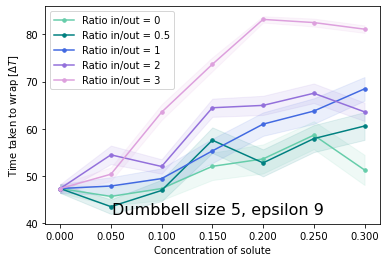

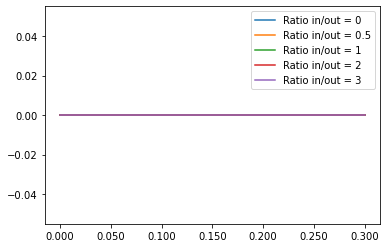

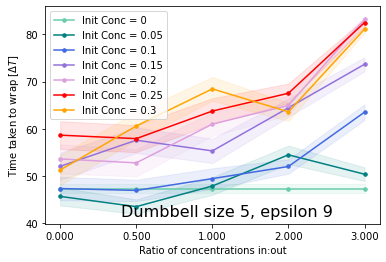

In [136]:
#fig,ax = plt.subplots()

Init = "0.000 0.050 0.100 0.150 0.200 0.250 0.300".split()
Rat = "0.000 0.500 1.000 2.000 3.000".split()
wrapEngulfed = 7.2

AvSpeed = np.zeros((len(Init),len(Rat)))
AvSpeed_ = np.zeros((len(Init),len(Rat)))
AvStartNom = np.zeros((len(Init),len(Rat)))
STDSpeed = np.zeros((len(Init),len(Rat)))
AvSimLength = np.zeros((len(Init),len(Rat)))
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
for l in range(len(Init)):
    for k in range(len(Rat)):
        Speeds = []
        for i in range(30):
            #print(StartNom)
            StartNom = []
            count = 0
            wrapN = pandas.read_csv(datadir + "wrappingfilesTens/wrapping_9_5.0_init_"+str(Init[l])+"_rat_"+str(Rat[k])+"_seed_"+str(i+1)+".dat", header = None, sep=' ')[1]
            if len(wrapN) >4:

                for j in range(len(wrapN)):
                    if j == 0:
                        StartNom.append(wrapN[j])
                    R = 5.0
                    denom = float(R)**2
                    wrap_rescaled = np.divide(wrapN[j],denom)
                    wrapEng = wrapEngulfed
                    if wrap_rescaled > float(wrapEng) and count == 0:
                        count = 1
                        timeToWrap = j
                    if count == 0 and j == len(wrapN)-1:
                        timeToWrap = 105
                Speeds.append(timeToWrap)
                
            #AvStartNom = np.mean(StartNom)
            
            if l==6 and k==1 and i == 49:
                print(len(Speeds))
        #AvSimLength[l][k] = np.mean(last_int)
        #print(np.mean(Speeds))
        AvStartNom[l][k]=np.mean(StartNom)
        AvSpeed_[l][k]=np.mean(Speeds)
        AvSpeed[l][k] = AvSpeed_[l][k]-AvStartNom[l][k]
        STDSpeed[l][k] = np.std(Speeds)/(np.sqrt(len(Speeds)))
        #if l==0 and k==1:
         #   print(AvSpeed[l][k])
        
ax3.plot(Init,AvSimLength[:,0],label='Ratio in/out = 0') #0
ax3.plot(Init,AvSimLength[:,1],label='Ratio in/out = 0.5') #0.5
ax3.plot(Init,AvSimLength[:,2],label='Ratio in/out = 1') 
ax3.plot(Init,AvSimLength[:,3],label='Ratio in/out = 2')
ax3.plot(Init,AvSimLength[:,4],label='Ratio in/out = 3')
ax3.legend()

ax2.plot(Init,AvSpeed[:,0],color = 'mediumaquamarine',marker='.', markersize = '7',label='Ratio in/out = 0') #rat = 0, there is nothing inside at all, when init = 0, no particles at all 
ax2.plot(Init,AvSpeed[:,1],color = 'teal',marker='.', markersize = '7', label='Ratio in/out = 0.5')
ax2.plot(Init,AvSpeed[:,2],color = 'royalblue',marker='.', markersize = '7', label='Ratio in/out = 1')
ax2.plot(Init,AvSpeed[:,3],color = 'mediumpurple',marker='.', markersize = '7', label='Ratio in/out = 2')
ax2.plot(Init,AvSpeed[:,4],color = 'plum',marker='.', markersize = '7', label='Ratio in/out = 3')
ax2.fill_between(Init,np.add(AvSpeed[:,0],0.5*STDSpeed[:,0]), np.add(AvSpeed[:,0],-0.5*STDSpeed[:,0]), color = "mediumaquamarine", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,1],0.5*STDSpeed[:,1]), np.add(AvSpeed[:,1],-0.5*STDSpeed[:,1]), color = "teal", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,2],0.5*STDSpeed[:,2]), np.add(AvSpeed[:,2],-0.5*STDSpeed[:,2]), color = "royalblue", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,3],0.5*STDSpeed[:,3]), np.add(AvSpeed[:,3],-0.5*STDSpeed[:,3]), color = "mediumpurple", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,4],0.5*STDSpeed[:,4]), np.add(AvSpeed[:,4],-0.5*STDSpeed[:,4]), color = "plum", alpha=0.1 )
textstr2 = "Dumbbell size 5, epsilon 9"
ax2.text(0.2, 0.1, textstr2, transform=ax2.transAxes, fontsize=16,verticalalignment='top')
ax2.set_ylabel(r"Time taken to wrap [$\Delta T$]")
ax2.set_xlabel(r"Concentration of solute")#"($ \mu m$)")
ax2.legend()

fig,ax = plt.subplots()

ax.plot(Rat,AvSpeed[0],color = 'mediumaquamarine',marker='.', markersize = '7',label='Init Conc = 0') #rat = 0, there is nothing inside at all, when init = 0, no particles at all 
ax.plot(Rat,AvSpeed[1],color = 'teal',marker='.', markersize = '7', label='Init Conc = 0.05')
ax.plot(Rat,AvSpeed[2],color = 'royalblue',marker='.', markersize = '7', label='Init Conc = 0.1')
ax.plot(Rat,AvSpeed[3],color = 'mediumpurple',marker='.', markersize = '7', label='Init Conc = 0.15')
ax.plot(Rat,AvSpeed[4],color = 'plum',marker='.', markersize = '7', label='Init Conc = 0.2')
ax.plot(Rat,AvSpeed[5],color = 'red',marker='.', markersize = '7', label='Init Conc = 0.25')
ax.plot(Rat,AvSpeed[6],color = 'orange',marker='.', markersize = '7', label='Init Conc = 0.3')
ax.fill_between(Rat,np.add(AvSpeed[0],0.5*STDSpeed[0]), np.add(AvSpeed[0],-0.5*STDSpeed[0]), color = "mediumaquamarine", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[1],0.5*STDSpeed[1]), np.add(AvSpeed[1],-0.5*STDSpeed[1]), color = "teal", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[2],0.5*STDSpeed[2]), np.add(AvSpeed[2],-0.5*STDSpeed[2]), color = "royalblue", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[3],0.5*STDSpeed[3]), np.add(AvSpeed[3],-0.5*STDSpeed[3]), color = "mediumpurple", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[4],0.5*STDSpeed[4]), np.add(AvSpeed[4],-0.5*STDSpeed[4]), color = "plum", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[5],0.5*STDSpeed[5]), np.add(AvSpeed[5],-0.5*STDSpeed[5]), color = "red", alpha=0.1 )
ax.fill_between(Rat,np.add(AvSpeed[6],0.5*STDSpeed[6]), np.add(AvSpeed[6],-0.5*STDSpeed[6]), color = "orange", alpha=0.1 )
textstr2 = "Dumbbell size 5, epsilon 9"
ax.text(0.2, 0.1, textstr2, transform=ax2.transAxes, fontsize=16,verticalalignment='top')
ax.set_ylabel(r"Time taken to wrap [$\Delta T$]")
ax.set_xlabel(r"Ratio of concentrations in:out")#"($ \mu m$)")
ax.legend()


#name1 = "SweetSpot_size" + str(sizes[l]) + "_eps"+ str(eps[k])+".png"
#fig2.savefig(plotsdir+name1)

# plotting in terms of tension

(3, 5)


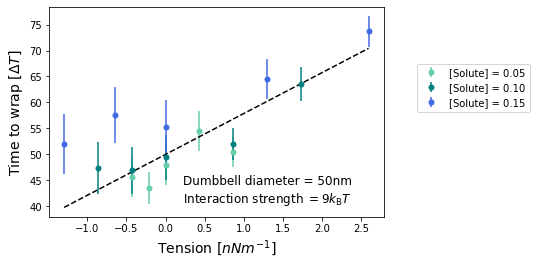

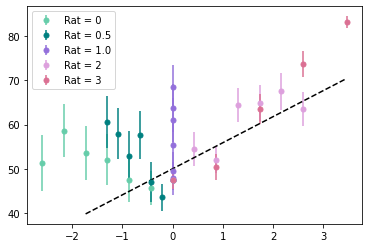

In [137]:

x =np.zeros((len(Init),len(Rat)))
ten =np.zeros((len(Init),len(Rat)))

for i in range(len(Init)):
    for j in range(len(Rat)):
        x[i][j] = FindPdiff(float(Rat[j]),float(Init[i]))
        
for i in range(len(Init)):
    for j in range(len(Rat)):
        ten[i][j] = RealUnits(x[i][j])[0]

fig,ax = plt.subplots(figsize = (6,4))
F = 400
Y_ = np.multiply(x[3],F)
Y = np.add(Y_,50)
ax.plot(ten[3], Y, linestyle = '--', color = 'black')
ax.errorbar(ten[1], AvSpeed[1],yerr=STDSpeed[1],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumaquamarine', label = "[Solute] = 0.05")
ax.errorbar(ten[2], AvSpeed[2],yerr=STDSpeed[2],linestyle = 'none',marker = '.', markersize = '10', color = 'teal', label = "[Solute] = 0.10")
ax.errorbar(ten[3], AvSpeed[3],yerr=STDSpeed[3],linestyle = 'none',marker = '.', markersize = '10', color = 'royalblue', label = "[Solute] = 0.15")
#ax.errorbar(ten[4, :4], AvSpeed[4, :4],yerr=STDSpeed[4, :4],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumpurple', label = "[Solute] = 0.20")
#ax.errorbar(ten[5, :4], AvSpeed[5, :4],yerr=STDSpeed[5, :4],linestyle = 'none',marker = '.', markersize = '10', color = 'palevioletred', label = "[Solute] = 0.25")
#ax.errorbar(ten[6, :4], AvSpeed[6, :4],yerr=STDSpeed[6, :4],linestyle = 'none',marker = '.', markersize = '10', color = 'plum', label = "[Solute] = 0.30")

textstr2 = r"Dumbbell diameter = 50nm" "\n" "Interaction strength $= 9k_{\mathrm{B}}T$"
ax.text(0.4, 0.2, textstr2, transform=ax.transAxes, fontsize=12,verticalalignment='top')
ax.set_xlabel(r"Tension [$nNm^{-1}$]", fontsize = 14)
ax.set_ylabel(r"Time to wrap [$\Delta T$]", fontsize = 14)
ax.legend(loc = (1.1,0.5))
plt.gcf().subplots_adjust(bottom=0.15)

fig.savefig('./plots/WrappingSpeedVSTension/speedVStensSize50.png')


fig2, ax2 = plt.subplots()
ax2.errorbar(ten[:,0], AvSpeed[:,0],yerr=STDSpeed[:,0],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumaquamarine', label = "Rat = 0")
ax2.errorbar(ten[:,1], AvSpeed[:,1],yerr=STDSpeed[:,1],linestyle = 'none',marker = '.', markersize = '10', color = 'teal', label = "Rat = 0.5")
ax2.errorbar(ten[:,2], AvSpeed[:,2],yerr=STDSpeed[:,2],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumpurple', label = "Rat = 1.0")
ax2.errorbar(ten[:,3], AvSpeed[:,3],yerr=STDSpeed[:,3],linestyle = 'none',marker = '.', markersize = '10', color = 'plum', label = "Rat = 2")
ax2.errorbar(ten[:5,4], AvSpeed[:5,4],yerr=STDSpeed[:5,4],linestyle = 'none',marker = '.', markersize = '10', color = 'palevioletred', label = "Rat = 3")
ax2.plot(ten[4], Y, linestyle = '--', color = 'black')
ax2.legend()

print(np.shape(ten[:3,:]))
TenSize50 = np.reshape(ten[:3,:], 15)
SpeedSize50 = np.reshape(AvSpeed[:3,:], 15)
SpeedSize50STD = np.reshape(STDSpeed[:3,:], 15)


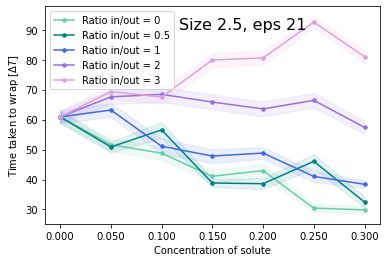

In [138]:
Init = "0.000 0.050 0.100 0.150 0.200 0.250 0.300".split()
Rat = "0.000 0.500 1.000 2.000 3.000".split()
wrapEngulfed = 13.6
AvSpeed = np.zeros((len(Init),len(Rat)))
STDSpeed = np.zeros((len(Init),len(Rat)))
fig2,ax2 = plt.subplots()
for l in range(len(Init)):
    for k in range(len(Rat)):
        Speeds = []
        for i in range(30):
            StartNom = []
            count = 0
            wrapN = pandas.read_csv(datadir + "wrappingfilesTens/wrapping_21_2.5_init_"+str(Init[l])+"_rat_"+str(Rat[k])+"_seed_"+str(i+1)+".dat", header = None, sep=' ')[1]
            if len(wrapN) >4:

                for j in range(len(wrapN)):
                    if j == 0:
                        StartNom.append(wrapN[j])
                    R = 2.5
                    denom = float(R)**2
                    wrap_rescaled = np.divide(wrapN[j],denom)
                    #print(wrap_rescaled)
                    wrapEng = wrapEngulfed
                    if wrap_rescaled > float(wrapEng) and count == 0:
                        count = 1
                        timeToWrap = j
                    if count == 0 and j == len(wrapN)-1:
                        timeToWrap = 105
                Speeds.append(timeToWrap)
                #print(timeToWrap)
                
        AvSpeed[l][k]=np.mean(Speeds)
        STDSpeed[l][k] = np.std(Speeds)/(np.sqrt(len(Speeds)))
        

ax2.plot(Init,AvSpeed[:,0],color = 'mediumaquamarine',marker='.', markersize = '7',label='Ratio in/out = 0') #rat = 0, there is nothing inside at all, when init = 0, no particles at all 
ax2.plot(Init,AvSpeed[:,1],color = 'teal',marker='.', markersize = '7', label='Ratio in/out = 0.5')
ax2.plot(Init,AvSpeed[:,2],color = 'royalblue',marker='.', markersize = '7', label='Ratio in/out = 1')
ax2.plot(Init,AvSpeed[:,3],color = 'mediumpurple',marker='.', markersize = '7', label='Ratio in/out = 2')
ax2.plot(Init,AvSpeed[:,4],color = 'plum',marker='.', markersize = '7', label='Ratio in/out = 3')
ax2.fill_between(Init,np.add(AvSpeed[:,0],0.5*STDSpeed[:,0]), np.add(AvSpeed[:,0],-0.5*STDSpeed[:,0]), color = "mediumaquamarine", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,1],0.5*STDSpeed[:,1]), np.add(AvSpeed[:,1],-0.5*STDSpeed[:,1]), color = "teal", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,2],0.5*STDSpeed[:,2]), np.add(AvSpeed[:,2],-0.5*STDSpeed[:,2]), color = "royalblue", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,3],0.5*STDSpeed[:,3]), np.add(AvSpeed[:,3],-0.5*STDSpeed[:,3]), color = "mediumpurple", alpha=0.1 )
ax2.fill_between(Init,np.add(AvSpeed[:,4],0.5*STDSpeed[:,4]), np.add(AvSpeed[:,4],-0.5*STDSpeed[:,4]), color = "plum", alpha=0.1 )
textstr2 = "Size 2.5, eps 21"
ax2.text(0.4, 0.95, textstr2, transform=ax2.transAxes, fontsize=16,verticalalignment='top')
ax2.set_ylabel(r"Time taken to wrap [$\Delta T$]")
ax2.set_xlabel(r"Concentration of solute")#"($ \mu m$)")
ax2.legend()

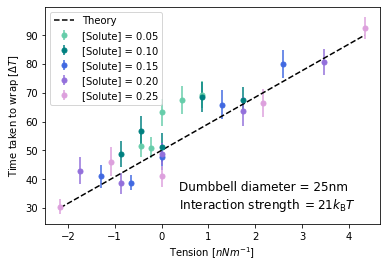

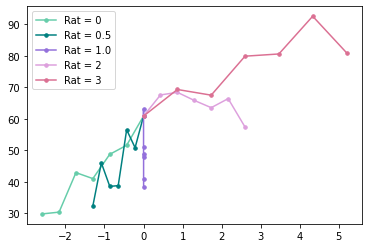

In [139]:
x =np.zeros((len(Init),len(Rat)))
ten =np.zeros((len(Init),len(Rat)))

for i in range(len(Init)):
    for j in range(len(Rat)):
        x[i][j] = FindPdiff(float(Rat[j]),float(Init[i]))
        
for i in range(len(Init)):
    for j in range(len(Rat)):
        #print("i", i, "j", j)
        #print(x[0][0])
        #print(RealUnits(x[0][0]))
        ten[i][j] = RealUnits(x[i][j])[0]
        
fig,ax = plt.subplots()

F = 470
Y_ = np.multiply(x[5],F)
Y = np.add(Y_,50)
ax.plot(ten[5], Y, linestyle = '--', color = 'black', label = 'Theory')

ax.errorbar(ten[1], AvSpeed[1],yerr=STDSpeed[1],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumaquamarine', label = "[Solute] = 0.05")
ax.errorbar(ten[2], AvSpeed[2],yerr=STDSpeed[2],linestyle = 'none',marker = '.', markersize = '10', color = 'teal', label = "[Solute] = 0.10")
ax.errorbar(ten[3], AvSpeed[3],yerr=STDSpeed[3],linestyle = 'none',marker = '.', markersize = '10', color = 'royalblue', label = "[Solute] = 0.15")
ax.errorbar(ten[4], AvSpeed[4],yerr=STDSpeed[4],linestyle = 'none',marker = '.', markersize = '10', color = 'mediumpurple', label = "[Solute] = 0.20")
ax.errorbar(ten[5], AvSpeed[5],yerr=STDSpeed[5],linestyle = 'none',marker = '.', markersize = '10', color = 'plum', label = "[Solute] = 0.25")
#ax.errorbar(ten[6], AvSpeed[6],yerr=STDSpeed[6],linestyle = 'none',marker = '.', markersize = '10', color = 'palevioletred', label = "[Solute] = 0.30")

textstr2 = r"Dumbbell diameter = 25nm" "\n" "Interaction strength $= 21k_{\mathrm{B}}T$"
ax.text(0.4, 0.2, textstr2, transform=ax.transAxes, fontsize=12,verticalalignment='top')
ax.set_xlabel(r"Tension [$nNm^{-1}$]")
ax.set_ylabel(r"Time taken to wrap [$\Delta T$]")
ax.legend()
#fig.savefig('./plots/WrappingSpeedVSTension/speedVStensSize25.png')


fig2, ax2 = plt.subplots()

ax2.plot(ten[:,0], AvSpeed[:,0],marker = '.', markersize = '7', color = 'mediumaquamarine', label = "Rat = 0")
ax2.plot(ten[:,1], AvSpeed[:,1],marker = '.', markersize = '7', color = 'teal', label = "Rat = 0.5")
ax2.plot(ten[:,2], AvSpeed[:,2],marker = '.', markersize = '7', color = 'mediumpurple', label = "Rat = 1.0")
ax2.plot(ten[:,3], AvSpeed[:,3],marker = '.', markersize = '7', color = 'plum', label = "Rat = 2")
ax2.plot(ten[:,4], AvSpeed[:,4],marker = '.', markersize = '7', color = 'palevioletred', label = "Rat = 3")

ax2.legend()


TenSize25 = np.reshape(ten, 35)
SpeedSize25 = np.reshape(AvSpeed, 35)
SpeedSize25STD = np.reshape(STDSpeed, 35)



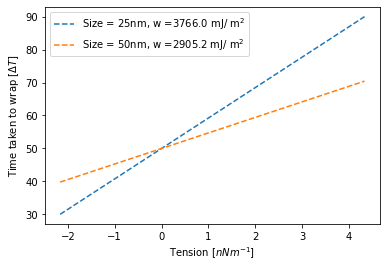

In [140]:
fig,ax = plt.subplots()
F1 = 470
Y1_ = np.multiply(x[5],F)
Y1 = np.add(Y_,50)

F2 = 400
Y2_ = np.multiply(x[3],F2)
Y2 = np.add(Y2_,50)

kt = 4.11*10**-18 #(in mJ)
msq = 10**-18
converter = 13.8 #mK/m^2
onekBTpernmSq = 4.11 #mJ per m^2

Eps = 21
size = 25
number = 90 #number of beads in vicinity when wrapped
W1 = Eps*(2*4*np.pi*(size/2)**2)*onekBTpernmSq/number
Eps = 9
size = 50
number = 200 #number of beads in vicinity when wrapped
W2 = Eps*(2*4*np.pi*(size/2)**2)*onekBTpernmSq/number

Eps = 21 #4.34 kBT (?)
size = 2.5 #sigma
number = 90
W11 = (Eps*(2*4*np.pi*(size/2)**2)/number)*converter
Eps = 9 #4.34 kBT (?)
size = 5 #sigma
number = 200
W22 = (Eps*(2*4*np.pi*(size/2)**2)/number)*converter


ax.plot(ten[5], Y1, linestyle = '--', color = 'tab:blue', label = r'Size = 25nm, w =' + str(np.round(W1,1)) + ' $\mathrm{mJ}/ \ \mathrm{m}^{2}$')
ax.plot(ten[5], Y2, linestyle = '--', color = 'tab:orange', label = r'Size = 50nm, w ='+ str(np.round(W2,1))+ ' $\mathrm{mJ}/ \ \mathrm{m}^{2}$')
ax.set_xlabel(r"Tension [$nNm^{-1}$]")
ax.set_ylabel(r"Time taken to wrap [$\Delta T$]")
ax.legend()
folder = 'Documents/PHD/Dumbbells/plots/WrappingSpeedVSTension/'
fig.savefig('./plots/WrappingSpeedVSTension/linearLines2.5AND5.0.pdf')

# Comparing Theory and simulations

Text(0, 0.5, 'Time taken to wrap [$\\Delta T$]')

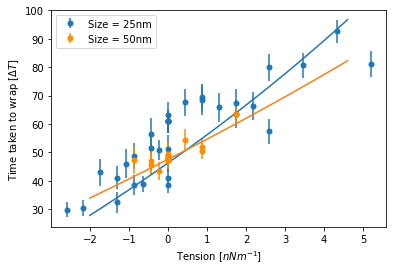

In [147]:
fig,ax = plt.subplots()

ax.errorbar(TenSize25, SpeedSize25,yerr=SpeedSize25STD,linestyle = 'none',marker = '.', markersize = '10', color = 'tab:blue', label = "Size = 25nm")
ax.errorbar(TenSize50, SpeedSize50,yerr=SpeedSize50STD,linestyle = 'none',marker = '.', markersize = '10', color = 'darkorange', label = "Size = 50nm")

k = 10**-16*10**-3
R = 50*10**-9
R2 = 27*10**-9
W = 0.4*10**-3 #(50kBT/(R**2) where R = 5)
W2 = 1.174*10**-3
sigma = 0.001*10**-3

Rs = "25 50 27 35 40 45 50".split()
Ws = "1.3847 0.430 1.2 0.9 0.75 0.6 0.45".split()
mu=1
for j in range(2):
    #print(len(Tension), len(Times_T1))
    W = Ws[j]
    R = Rs[j]
    R = float(R)*10**-9
    W = float(W)*10**-3
    Times_T1 = []
    #Times_T2 = []
    Tension = []
    for i in range(100):
        tens = (-2*sigma + i*sigma*2/30) #x10^6 just to get it on same axis
        Tension.append(tens)
        Time =  T_full(R,W,mu,k,tens)[1]
        Times_T1.append(Time)
        Times_T1_ = np.multiply(Times_T1,10**3)
    Times_T1__ = Times_T1_ - min(Times_T1_)*19/20
    #ax.plot(Tension,Times_T1_, label = r'Size = 50nm W = 0.4$\mathrm{mJ}/\mathrm{m}^{2}$', label = str(j))
    ax.plot(np.multiply(Tension,10**6),np.multiply(Times_T1__,100/0.23))
ax.legend()
ax.set_xlabel(r"Tension [$nNm^{-1}$]")
ax.set_ylabel(r"Time taken to wrap [$\Delta T$]")
